In [136]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
import qutip as qt
from IPython.display import HTML
import scipy as sp

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

## KIT's qubit

This notebook studies the qubit proposed by KIT. It's lumped element model is:
<img src='../Other/Single qubit 4 nodes CC coupled to ground.jpg' width='500'>


# qubit vs parameter

In [137]:
param_name = 'E_J'
param_values = np.linspace(9, 11, 10)
H_qubit_list = sq_ext.KIT_qubit_vs_param(EJ=param_values)
H_0 = sq_ext.KIT_qubit_vs_param()[0]

In [132]:
param_name = '\\Delta'
param_values = np.geomspace(1e-2, 1e0, 10)
H_qubit_list = sq_ext.KIT_qubit_vs_param(Δ=param_values)
H_0 = sq_ext.KIT_qubit_vs_param(Δ=0)[0]

In [144]:
param_name = '\\varphi_{ext}'
param_values = np.linspace(0.49,0.5,20, endpoint=False)
H_qubit_list = sq_ext.KIT_qubit_vs_param(φ_ext=param_values)
H_0 = sq_ext.KIT_qubit_vs_param()[0]

In [150]:
H_eff_vs_params = np.array([sq_ext.H_eff_SWT(H_0, H, 5) for H in H_qubit_list])
H_eff_0 = sq_ext.H_eff_SWT(H_0, H_0, 5) 
N_f, N_r = sq_ext.get_energy_indices(sq_ext.KIT_qubit(), sq_ext.KIT_fluxonium(), sq_ext.KIT_resonator())

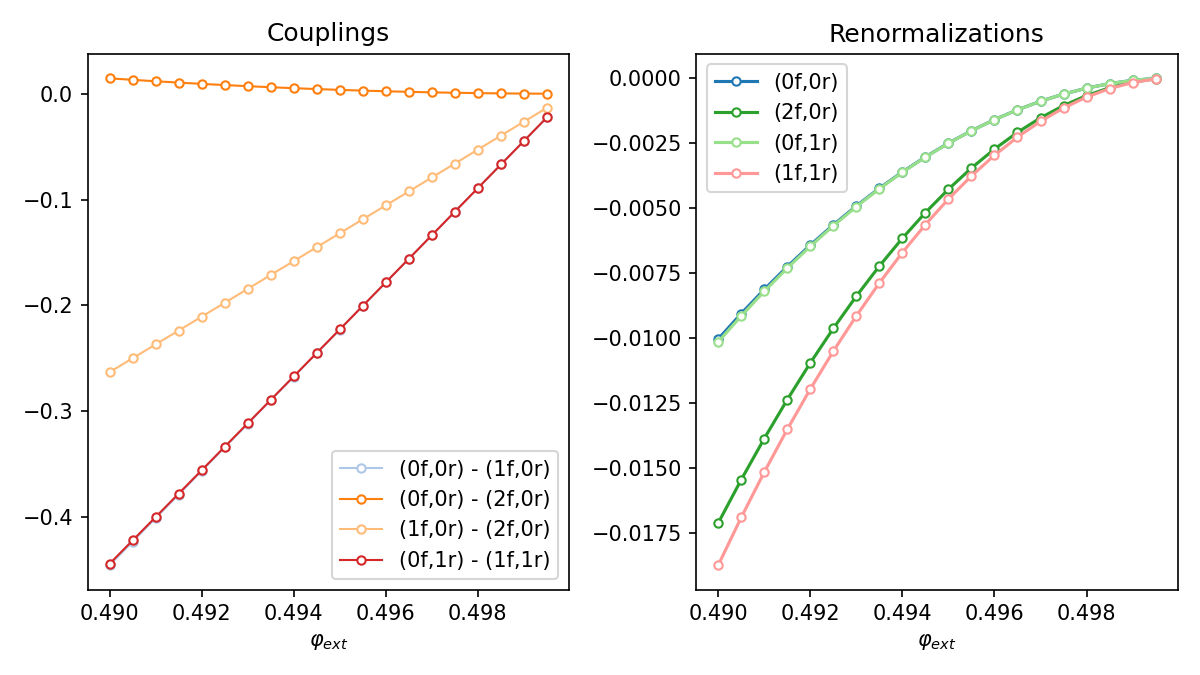

In [151]:
fig, ax1, ax2 = sq_ext.plot_H_eff_vs_param(H_eff_vs_params, H_eff_0, param_values, param_name, N_f, N_r, threshold=1e-2, n_eig_plot = False)

In [152]:
H_eff_vs_params

array([[[6.696899691574, -0.445484479184, 0.014540571711, -0.001179522869, 0.000097644463],
        [-0.445484479184, 8.650157691751, -0.263018103631, 0.000012645411, -0.000858046769],
        [0.014540571711, -0.263018103631, 12.850913709972, 0.002629047445, 0.000010346481],
        [-0.001179522869, 0.000012645411, 0.002629047445, 13.905241682455, -0.444089634877],
        [0.000097644463, -0.000858046769, 0.000010346481, -0.444089634877, 15.842083762932]],

       [[6.697876154061, -0.423220989875, 0.013126213472, -0.001120856540, 0.000088268311],
        [-0.423220989875, 8.650369001483, -0.249935499860, 0.000011361970, -0.000815260264],
        [0.013126213472, -0.249935499860, 12.852578293680, 0.002499036272, 0.000009000112],
        [-0.001120856540, 0.000011361970, 0.002499036272, 13.906238397918, -0.422024578109],
        [0.000088268311, -0.000815260264, 0.000009000112, -0.422024578109, 15.843919632509]],

       [[6.698803006466, -0.400955830264, 0.011783720114, -0.001062140